<a href="https://colab.research.google.com/github/jahnavibandaru2006-bot/Human-Action-Detection-using-CNN/blob/main/Human_Action_Detection_CNN_using_csv_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Human Action Recognition Using Convolutional Neural Networks (CNN) With CSV-Based Image Labels
This project builds a Convolutional Neural Network (CNN) to recognize human actions from images. The dataset uses CSV files to map each image to its label, and the model is trained using manually preprocessed image–label pairs. The system predicts actions such as walking, sitting, and various daily activities.

In [1]:
#Import Libraries
import os
os.listdir('/content')


['.config', 'archive1.zip', 'sample_data']

In [2]:
#Set Paths
import zipfile

zip_path = "/content/archive1.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

print("Extracted!")


Extracted!


In [3]:
import zipfile
import os

zip_path = "/content/archive1.zip"   # <-- rename this to your file name

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

data_dir = '/content/dataset'
print("Extracted to:", data_dir)


Extracted to: /content/dataset


In [4]:
# STEP 3: Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
import os
os.listdir('/content')


['.config', 'archive1.zip', 'dataset', 'sample_data']

In [6]:
import os
print(os.listdir('/content/dataset'))


['Human Action Recognition']


In [9]:
import os
print(os.listdir('/content/dataset/Human Action Recognition'))


['Training_set.csv', 'train', 'test', 'Testing_set.csv']


In [37]:
train_df = pd.read_csv("/content/dataset/Human Action Recognition/Training_set.csv")



In [12]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [13]:
train_csv_path = "/content/dataset/Human Action Recognition/Training_set.csv"
test_csv_path  = "/content/dataset/Human Action Recognition/Testing_set.csv"

train_img_path = "/content/dataset/Human Action Recognition/train/"
test_img_path  = "/content/dataset/Human Action Recognition/test/"


In [14]:
train_df = pd.read_csv(train_csv_path)
test_df  = pd.read_csv(test_csv_path)

train_df.head()


,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


In [38]:
IMG_HEIGHT = 64
IMG_WIDTH = 64

X_train = []
y_train = []

for i, row in train_df.iterrows():
    img_name = row['filename']
    label = row['label']

    img = load_img(train_img_path + img_name, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img = img_to_array(img) / 255.0

    X_train.append(img)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)


In [39]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_train = to_categorical(y_train_encoded)

num_classes = y_train.shape[1]
print("num_classes =", num_classes)



num_classes = 15


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)


In [21]:
print("y_train sample labels:", y_train[:10])


y_train sample labels: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [23]:
num_classes = y_train.shape[1]
print("Number of classes:", num_classes)


Number of classes: 15


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [27]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)


In [26]:
# STEP 5: CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')   # <-- FIXED
])

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,627,087 (6.21 MB)

 Trainable params: 1,627,087 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# STEP 6: Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val)
)


Epoch 1/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 70s 216ms/step - accuracy: 0.0981 - loss: 2.6680 - val_accuracy: 0.2230 - val_loss: 2.4000
Epoch 2/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 65s 207ms/step - accuracy: 0.1894 - loss: 2.4444 - val_accuracy: 0.2635 - val_loss: 2.3232
Epoch 3/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 82s 207ms/step - accuracy: 0.2580 - loss: 2.2853 - val_accuracy: 0.2825 - val_loss: 2.2516
Epoch 4/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 64s 203ms/step - accuracy: 0.2949 - loss: 2.1621 - val_accuracy: 0.3171 - val_loss: 2.1461
Epoch 5/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 84s 208ms/step - accuracy: 0.3457 - loss: 1.9813 - val_accuracy: 0.3135 - val_loss: 2.1288
Epoch 6/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 64s 204ms/step - accuracy: 0.3813 - loss: 1.8481 - val_accuracy: 0.3290 - val_loss: 2.1204
Epoch 7/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 62s 198ms/step - accuracy: 0.4340 - loss: 1.7040 - val_accuracy: 0.3440 - val_loss: 2.0784
Epoch 8/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 86s 211ms/step - accuracy: 0.4728 - loss: 1

In [31]:
print(train_df.columns)
train_df.head()


Index(['filename', 'label'], dtype='object')


,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


In [33]:
print(test_df.columns)
test_df.head()


Index(['filename'], dtype='object')


,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [52]:
#step7:Testing
X_test = []

for i, row in test_df.iterrows():
    img_name = row['filename']
    img = load_img(test_img_path + img_name, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img = img_to_array(img) / 255.0
    X_test.append(img)

X_test = np.array(X_test)

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

predicted_labels = le.inverse_transform(predicted_classes)

print(predicted_labels[:10])


169/169 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step
['fighting' 'eating' 'clapping' 'texting' 'sleeping' 'clapping' 'cycling'
 'listening_to_music' 'listening_to_music' 'texting']


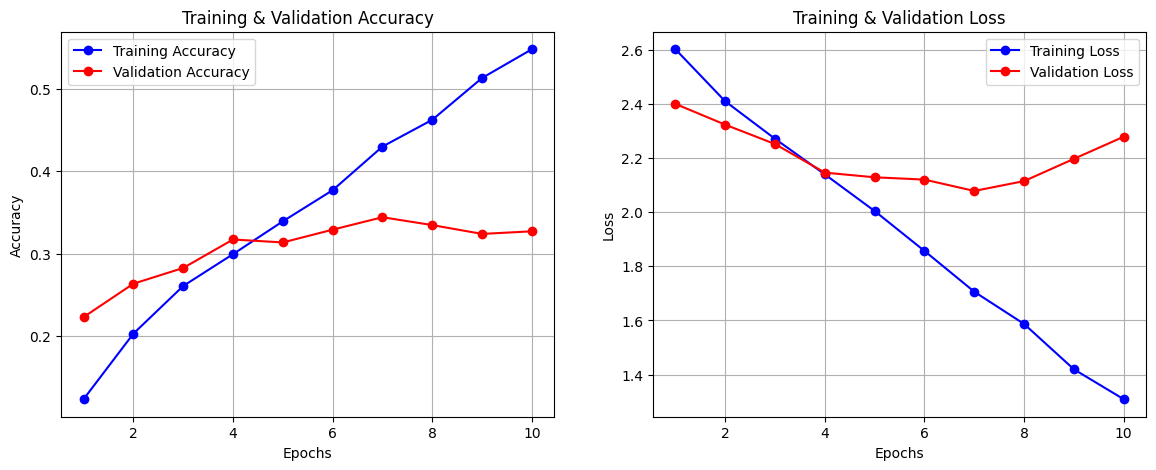

In [43]:
# STEP 8: Plot performance
import matplotlib.pyplot as plt

# Extract required values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))

# ---------------- Accuracy plot ----------------
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-o', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-o', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# ---------------- Loss plot ----------------
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-o', label='Training Loss')
plt.plot(epochs, val_loss, 'r-o', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.show()


In [50]:
#STEP 9 — Test Predictions
predicted_labels = le.inverse_transform(predicted_classes)


In [51]:
# STEP 10: Save model (optional)
model.save("har_cnn_model.h5")
print("Model saved successfully!")


Model saved successfully!
